In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

--- Dataset Head ---
   mean_profile  std_profile  kurtosis_profile  skewness_profile  mean_dmsnr  \
0    140.562500    55.683782         -0.234571         -0.699648    3.199833   
1    102.507812    58.882430          0.465318         -0.515088    1.677258   
2    103.015625    39.341649          0.323328          1.051164    3.121237   
3    136.750000    57.178449         -0.068415         -0.636238    3.642977   
4     88.726562    40.672225          0.600866          1.123492    1.178930   

   std_dmsnr  kurtosis_dmsnr  skewness_dmsnr  target_class  
0  19.110426        7.975532       74.242225             0  
1  14.860146       10.576487      127.393580             0  
2  21.744669        7.735822       63.171909             0  
3  20.959280        6.896499       53.593661             0  
4  11.468720       14.269573      252.567306             0  

--- Class Distribution ---
target_class
0    16259
1     1639
Name: count, dtype: int64

Model Accuracy: 0.9721

--- Classification

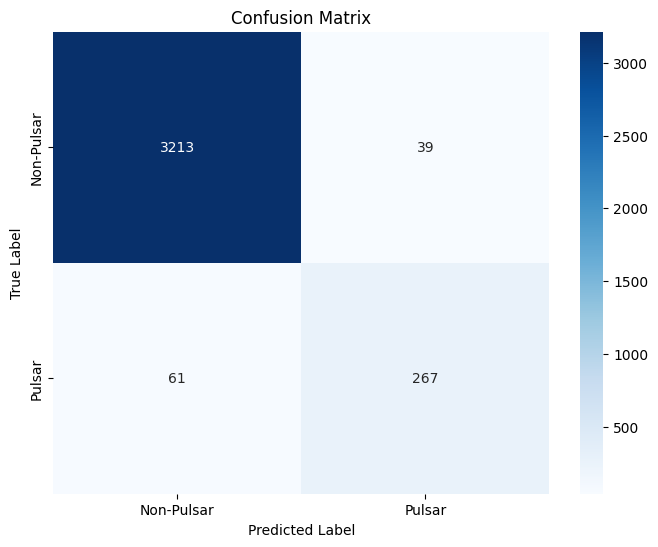


AUC Score: 0.9216


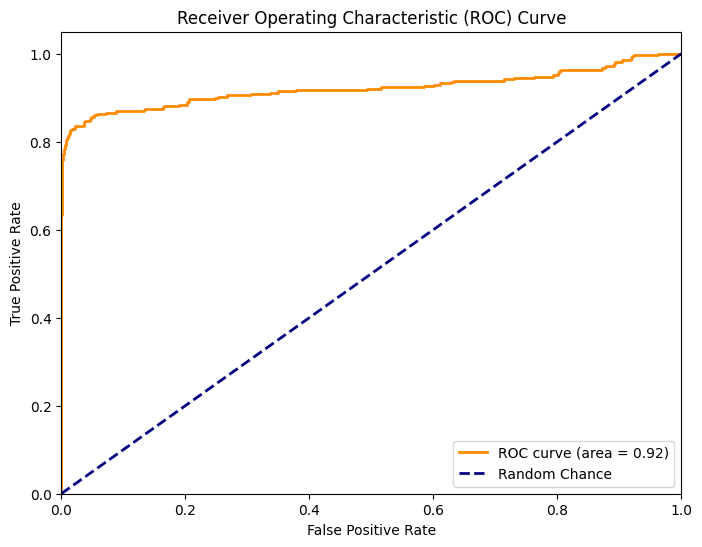

In [7]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

file_path = '/kaggle/input/pulsar-dataset-htru2/HTRU_2.csv'
col_names = [
    'mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile',
    'mean_dmsnr', 'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target_class'
]
pulsar_df = pd.read_csv(file_path, header=None, names=col_names)

print("--- Dataset Head ---")
print(pulsar_df.head())
print("\n--- Class Distribution ---")
print(pulsar_df['target_class'].value_counts())

X = pulsar_df.drop('target_class', axis=1)
y = pulsar_df['target_class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
perceptron_model = Perceptron(random_state=42)
perceptron_model.fit(X_train_scaled, y_train)
y_pred = perceptron_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Pulsar', 'Pulsar'],
            yticklabels=['Non-Pulsar', 'Pulsar'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
y_scores = perceptron_model.decision_function(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
print(f"\nAUC Score: {roc_auc:.4f}")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()